1 UP SAMPLING 
2 DOWN SAMPLING 

In [1]:

import numpy as np
import pandas as pd

# Set the random seed for reproducibility
np.random.seed(123)

# Create a dataframe with two classes
n_samples = 1000
class_0_ratio = 0.9
n_class_0 = int(n_samples * class_0_ratio)
n_class_1 = n_samples - n_class_0

In [2]:

n_class_0,n_class_1

(900, 100)

In [3]:
## CREATE MY DATAFRAME WITH IMBALANCED DATASET
class_0 = pd.DataFrame({
    'feature_1': np.random.normal(loc=0, scale=1, size=n_class_0),
    'feature_2': np.random.normal(loc=0, scale=1, size=n_class_0),
    'target': [0] * n_class_0
})

class_1 = pd.DataFrame({
    'feature_1': np.random.normal(loc=2, scale=1, size=n_class_1),
    'feature_2': np.random.normal(loc=2, scale=1, size=n_class_1),
    'target': [1] * n_class_1
})

In [4]:
df=pd.concat([class_0,class_1]).reset_index(drop=True)

In [5]:

df.tail()

,feature_1,feature_2,target
995,1.376371,2.845701,1
996,2.239810,0.880077,1
997,1.131760,1.640703,1
998,2.902006,0.390305,1
999,2.697490,2.013570,1


In [6]:

df['target'].value_counts()

target
0    900
1    100
Name: count, dtype: int64

In [7]:
## upsampling
df_minority=df[df['target']==1]
df_majority=df[df['target']==0]

In [8]:
from sklearn.utils import resample
df_minority_upsampled=resample(df_minority,replace=True, #Sample With replacement
         n_samples=len(df_majority),
         random_state=42
        )

In [9]:
df_minority_upsampled.shape

(900, 3)

In [10]:

df_minority_upsampled.head()

,feature_1,feature_2,target
951,1.125854,1.843917,1
992,2.196570,1.397425,1
914,1.932170,2.998053,1
971,2.272825,3.034197,1
960,2.870056,1.550485,1


In [11]:

df_upsampled=pd.concat([df_majority,df_minority_upsampled])

In [12]:

df_upsampled=pd.concat([df_majority,df_minority_upsampled])

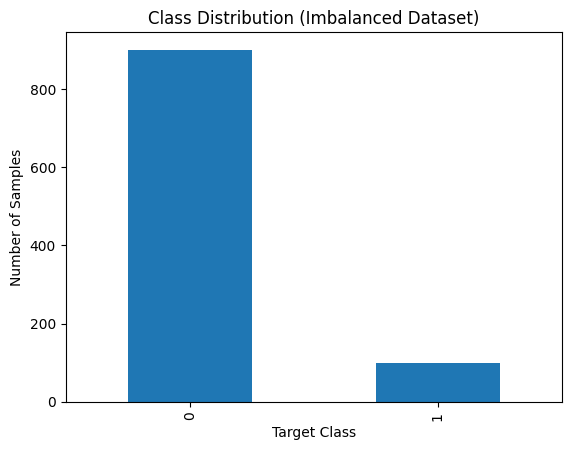

In [13]:
import matplotlib.pyplot as plt

df['target'].value_counts().plot(kind='bar')
plt.title("Class Distribution (Imbalanced Dataset)")
plt.xlabel("Target Class")
plt.ylabel("Number of Samples")
plt.show()


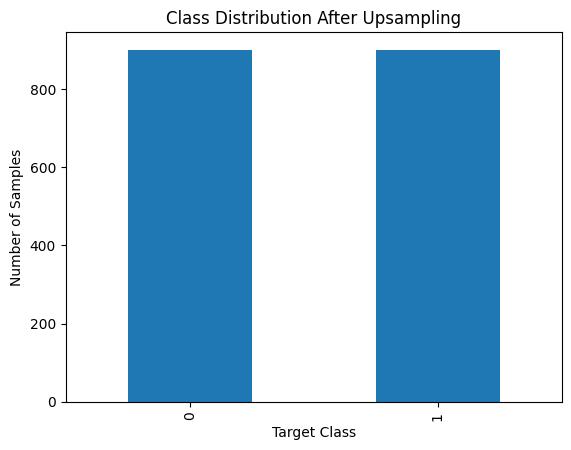

In [19]:
df_upsampled['target'].value_counts().plot(kind='bar')
plt.title("Class Distribution After Upsampling")
plt.xlabel("Target Class")
plt.ylabel("Number of Samples")
plt.show()
